In [3]:
!pip install pydicom pandas matplotlib openslide-python openslide-bin

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ------------------------- -------------- 2.6/4.2 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 12.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pydicom
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dicom_df = None
file_path = f'../data/CBIS-DDSM/CBIS-DDSM/Calc-Training_P_00474_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.275365930412464771525793839621783178044/1.3.6.1.4.1.9590.100.1.2.416722881411737593414359448931127663526/1-1.dcm'

# Load the DICOM file
dicom_data = pydicom.dcmread(file_path)
dicom_data.decode()
dicom_df = pd.DataFrame(dicom_data.values())
dicom_df[0] = dicom_df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
dicom_df['name'] = dicom_df[0].apply(lambda x: x.name)
dicom_df['value'] = dicom_df[0].apply(lambda x: x.value)
dicom_df = dicom_df[['name', 'value']]

dicom_df = dicom_df.set_index('name').T.reset_index(drop=True)
print(dicom_df.columns.tolist())
dicom_df
    
    # Access the pixel data
    # image = dicom_data.pixel_array
    
    # plt.imshow(image, cmap="gray")
    # plt.title("DICOM Image")
    # plt.axis("off")
    # plt.show()
        

['Specific Character Set', 'SOP Class UID', 'SOP Instance UID', 'Study Date', 'Content Date', 'Study Time', 'Content Time', 'Accession Number', 'Modality', 'Conversion Type', "Referring Physician's Name", 'Series Description', "Patient's Name", 'Patient ID', "Patient's Birth Date", "Patient's Sex", 'Private Creator', 'Private tag data', 'Private tag data', 'Body Part Examined', 'Secondary Capture Device Manufacturer', "Secondary Capture Device Manufacturer's Model Name", 'Study Instance UID', 'Series Instance UID', 'Study ID', 'Series Number', 'Instance Number', 'Patient Orientation', 'Laterality', 'Samples per Pixel', 'Photometric Interpretation', 'Rows', 'Columns', 'Bits Allocated', 'Bits Stored', 'High Bit', 'Pixel Representation', 'Smallest Image Pixel Value', 'Largest Image Pixel Value', 'Pixel Data']


name,Specific Character Set,SOP Class UID,SOP Instance UID,Study Date,Content Date,Study Time,Content Time,Accession Number,Modality,Conversion Type,...,Photometric Interpretation,Rows,Columns,Bits Allocated,Bits Stored,High Bit,Pixel Representation,Smallest Image Pixel Value,Largest Image Pixel Value,Pixel Data
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.121880258312130736701...,20160807,20160503,162802,114204.438000,,MG,WSD,...,MONOCHROME2,5326,3301,16,16,15,0,0,65535,b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff...


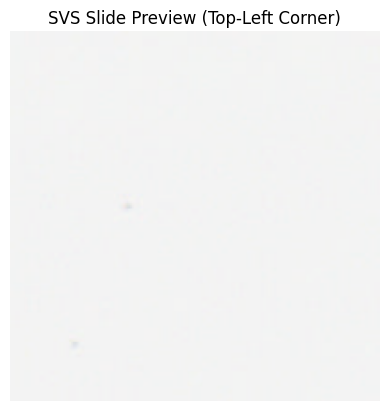

In [15]:
import openslide

# Replace this with the path to your .svs file
svs_path = "D:/TFM/breast_cancer_detection/data/PKG - CPTAC-BRCA_v1/BRCA/01BR001-4ffefc66-d0ba-4a36-b4fa-35bd91.svs"

# Open the slide
slide = openslide.OpenSlide(svs_path)

# Read a region of the slide at level 0 (highest resolution)
region = slide.read_region(location=(0, 0), level=0, size=(200, 200))

# Display it using matplotlib
plt.imshow(region)
plt.title("SVS Slide Preview (Top-Left Corner)")
plt.axis("off")
plt.show()
